# 3. Analisis exploratoria de datos - EDA - II

#### [Elementos y funciones de Pandas mas avanzadas para el análisis exploratorio de datos - II](#steps)
#### [Continuacion del ejemplo de analisis exploratoria datos](#example)

Vamos a profundizar el análisis que comiezamos anteriormente y definamos las condiciones estadísticas adecuadas para seleccionar qué datos son válidos para el aprendizaje automático.

<a id="steps"></a>
## Elementos y funciones de Pandas mas avanzadas para el análisis exploratorio de datos - II

<a id="steps"></a>
## Pasos y heramientas para el análisis exploratorio de datos II

6. Compruebar la correlación entre variables y eliminar las que tengan una correlación superior a 0,8 
  * `sns.corr()` - funcion de Seaborn para generar un mapa de calor de correlación entre variables
  * `stats.pearsonr` - funcion estadistica que devuelve valor de corelacion y valor `p-value` entre dos variables
7. Buscar y eliminar valores atípicos
  * `sns.scatterplot()` - visualiza relacion entre dos variables 
  * IQR y boxplot `sns.boxplot()` - muestra distribuciones con respecto a las categorías de variable
  * `z-score`
8. Comprobar la normalidad de la distribución de continua variable
  * `distplot()` - grafica una distribución de densidad de variable continua
9. Pandas profiling
  * `pp.ProfileReport` - genera un informe básico de EDA sobre el DataFrame

<a id="example"></a>
## Continuacion del ejemplo de analisis exploratoria datos

Vamos importar todas las bibliotecas y cargar el nuevo conjunto de datos guardado recientemente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('data/kc_house_data_new.csv',sep=',')

In [2]:
df.shape

(21612, 24)

In [3]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'year_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'city', 'year', 'month', 'day'],
      dtype='object')

### 6. Compruebar la correlación entre variables - Pearson (multicolinealidad)

En este conjunto de datos hay más de 20 características diferentes de cada casa que pueden o no influir en el precio de la casa. Unca de las columnas se llama `sqft_living` que se refiera a tamano de la casa en  pies cuadrados. 

Ahora podemos simplemente agregar una nueva columna `sqm_living` con un tamaño de la casa con $m^2$ multiplicando columna `sqft_living` con factor `0.093` 

In [4]:
df['sqm_living']=df['sqft_living']*0.093

In [5]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,city,year,month,day,sqm_living
0,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,Seattle,2014,10,13,109.74
1,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,Seattle,2014,12,9,239.01
2,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,Kenmore,2015,2,25,71.61


<AxesSubplot:xlabel='sqft_living', ylabel='sqm_living'>

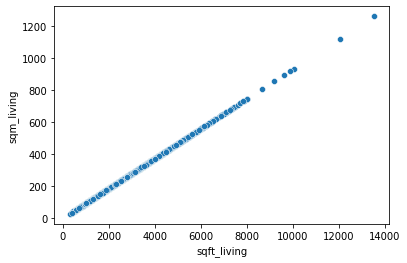

In [6]:
sns.scatterplot(data=df,x='sqft_living',y='sqm_living')

La diferencia entre esas dos columnas es simplemente por un coeficiente, por eso el diagrama de dispersión de los valores de estas dos columnas muestra una línea recta. Eso significa que esas dos variables dependen linealmente de cada uno. O en otras palabras, están correlacionados linealmente. Como la línea es perfectamente recta, decimos que las variables están correlacionadas fuerte.

La fuerza de dependencia lineal entre dos cualquieras variables se puede medir con el método de Pearson - llamado correlacion de Pearson.

La correlación de Pearson mide la dependencia lineal entre dos variables con un coeficiente entre -1 y 1. 

* +1 Correlación positiva completa   (eso seria en caso como arriva - linea recta con inclinacion hacia arriva)
* +0.8 Fuerte correlación positiva    
* +0.6 Correlación positiva moderada  
* 0 Sin correlación  
* -0.6 Correlación negativa moderada  
* -0.8 Fuerte correlación negativa  
* -1 Correlación negativa completa (linea recta con inclinacion hacia abajo)  

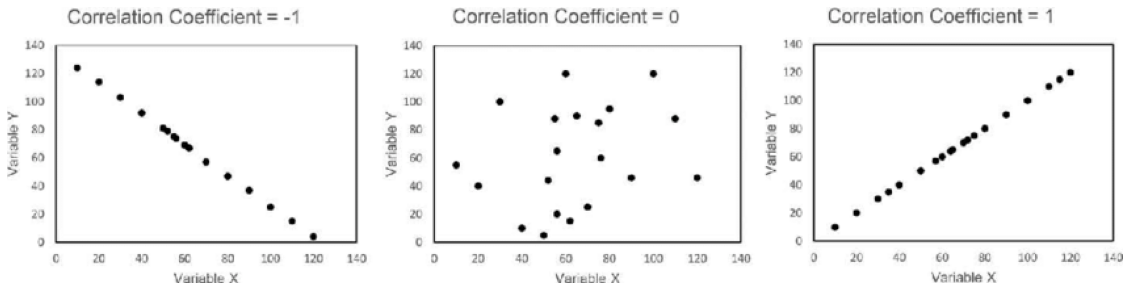

In [7]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.imshow(plt.imread('imgs/correlation_coefficients.png'))
ax.set_axis_off()

Cuando las variables están altamente correlacionadas, pueden introducir inestabilidad en el modelo. Por eso es recomendable remover las variables que muestran valor de corelacion mas alta que abs(0.8)

Es importante mencionar que `precio` de la cas como variable objetivo tendrá varias variables linealmente dependientes pero `NO` se los deben eliminar! Solamente las características de la casa que están linealmente correlacionadas podemos eliminar.

La correlación de Pearson es el método predeterminado de la función sns.corr() que devuelve una mapa de "calor" de las corelaciones y valores numericas

Veamos el mapa de correlación (matriz) de nuestro conjunto de datos.

<AxesSubplot:>

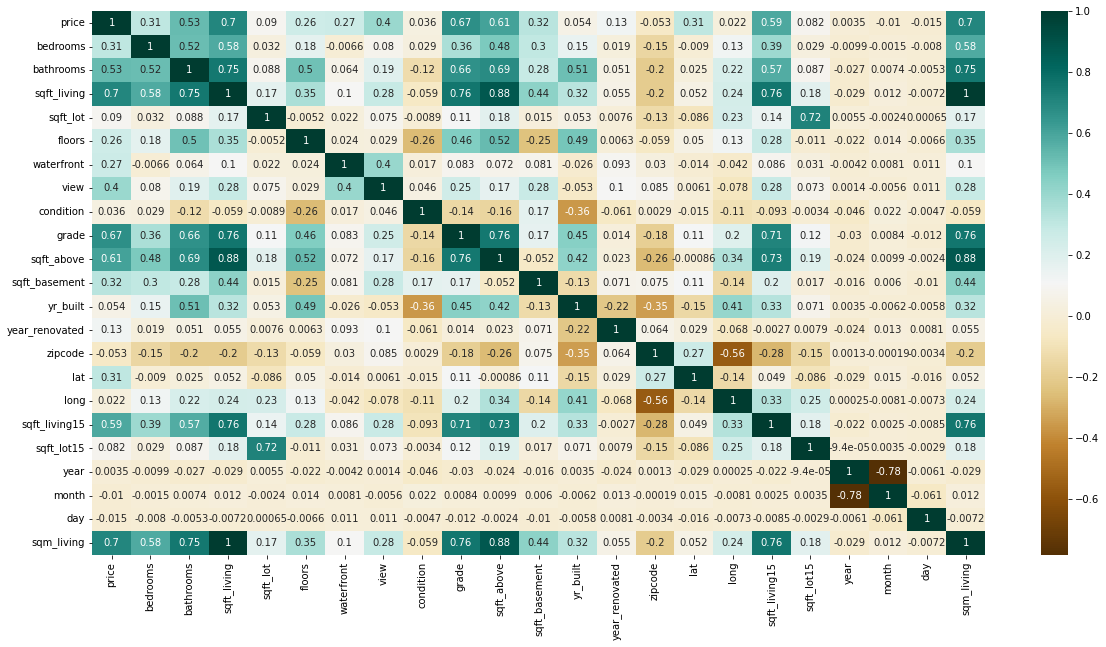

In [8]:
plt.figure(figsize=(20,10))
correlation_values= df.corr()
sns.heatmap(correlation_values,cmap='BrBG',annot=True)

Las correlaciones más altas se indican mediante cuadrados verdes más oscuros. Es fácil identificar la línea en el medio, donde cada variable se enfrenta a sí misma.

La matriz de correlación de Pandas puede ayudar a identificar características que tienen una correlación superior a un umbral definido. En este caso, utilicé el 80 % como umbral. Ahora está claro que `sqft_living` y `sqm_living` son solo una combinación lineal con otra, por lo tanto, están correlacionados al máximo (corr = 1) y uno es redundante y debe eliminarse. 
Tambien, `sqft_above` y `sqft_living` están demasiado correlacionados (corr=0.88), por lo que se debe eliminar uno. 

Otra vez, las variables linealmenter relacionadas con el precio no deben eliminarse. Porque columna `precio` es una variable objetivo y es obviamente que el `precio` pude depender linealmente de varias caracteristicas.

#### Hagamos una pequeña digresión:
También podemos decir cuán seguros estamos de que dos valores cualesquiera están correlacionados. Para eso podemos usar el llamado `p-value`. `p-value` es una cantidad estadística. Da la probabilidad de la hipótesis de que NO hay correlación entre las dos variables. Esto puede ser confuso: si el `p-value` es pequeño, significa que no hay razón para creer que las variables NO están linealmente correlacionadas o, mas simple, si el `p-value` es pequeño (o cero), significa que la las variables están correlacionadas. 

Podemos categorizar el valor del `p-value` para que sea más fácil de interpretar:

* `p-value` < 0.001: Fuerte certeza en el resultado
* `p-value` < 0.05: Certeza moderada en el resultado
* `p-value` < 0.1: Certeza débil en el resultado
* `p-value` > 0.1: Sin certeza en el resultado

Usemos scipy.stats (biblioteca científica. estadística de Python) para encontrar el `valor p` de las dos variables `sqm_living` `sqft_living`. 

In [9]:
import scipy.stats as stats

In [10]:
corr,p_value = stats.pearsonr(df['sqm_living'], df['sqft_living'])

`stats.pearsonr` en realidad devolvió dos números: `corr`, el coeficiente de correlación de Pearson (el mismo que obtuvimos en el mapa de calor anterior) y `p_value`: p-value

In [11]:
print(corr)
print(p_value)

1.0
0.0


El `p-value` es cero, por lo tanto, estamos seguros de que podemos eliminar una de las columnas. 

Sin embargo, cerrar el de digresión, cálculo del "valor p" no es tan común y, por lo general, el coeficiente de correlación es suficiente para decidir qué variables se pueden eliminar del conjunto de datos.

In [12]:
df=df.drop(['sqm_living'],axis=1)
df=df.drop(['sqft_above'],axis=1)

In [13]:
df.shape

(21612, 23)

In [14]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,...,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.401044e+05,3.370905,2.114774,2079.938599,1.510755e+04,1.494332,0.007542,0.234314,3.409402,7.656857,...,1971.004488,84.406163,98077.934249,47.560061,-122.213891,1986.585647,12768.816676,2014.322969,6.574403,15.687859
std,3.671279e+05,0.930037,0.770177,918.444375,4.142138e+04,0.539991,0.086519,0.766334,0.650746,1.175484,...,29.373936,401.688123,53.500031,0.138562,0.140830,685.389829,27304.759757,0.467622,3.115379,8.635119
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.219875e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471075,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000,2015.000000,9.000000,23.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


### 7. Buscar y eliminar valores atípicos

Un valor atípico es un punto o conjunto de puntos que son diferentes de otros puntos. A veces pueden ser muy altos o muy bajos. A menudo es una buena idea detectar y eliminar los valores atípicos. Porque los valores atípicos son una de las principales razones para dar como resultado un modelo menos preciso. Por lo tanto, es una buena idea eliminarlos. Los valores atipicos son normalmente errores pero no siempre. Valores atipicos pueden aparecer en el conjundo por varios difierentes motivos:

* Error humano al ingresar datos manualmente, como un error tipográfico
* Errores intencionales, como valores atípicos ficticios incluidos en un conjunto de datos para probar los métodos de detección
* Errores de muestreo que surgen de la extracción o mezcla de datos de fuentes inexactas o diversas
* Errores de procesamiento de datos que surgen de la manipulación de datos o mutaciones no intencionadas de un conjunto de datos
* Errores de medición como resultado de un error instrumental
* Errores experimentales, del proceso de extracción de datos o de la planificación o ejecución del experimento
* Valores atípicos naturales que ocurren "naturalmente" en el conjunto de datos, en lugar de ser el resultado de un error enumerado de otra manera. Estos errores naturales se conocen como novedades.

Hay dos tipicas técnicas de encontrar y eliminar valores atípicos:

* metodo grafio - visualizacion
* metodos estadistico - IQR (InterQuartile Range) - Rango intercuartil
* metodo estadistico - z-score

De los resultados de `df.describe()`, quedó claro que el valor de la cantidad de habitaciones para ser igual a 33 parece un valor atípico. Vamos verificar eso usando scatterplot:

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

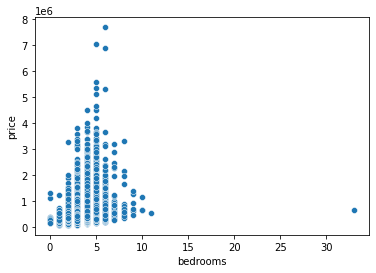

In [15]:
sns.scatterplot(data=df,x='bedrooms',y='price')

Desde el grafico es claro que valor de `bedrooms=33` es valor atipico. La casa con 33 cuartos puede ser un error tipográfico o una casa muy grande (hotel), sin embargo una casa tan grande tendría un precio más alto que una casa típica, pero en este caso no es.

Vamos ahora usar una heramienta estadística para buscar los valore atipicos. 
Un diagrama de caja (`boxplot`) es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles (mensionados en parte uno de EDA). Los diagramas de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) que indican variabilidad fuera de los cuartiles superior e inferior, de ahí los términos diagrama de caja y bigotes y diagrama de caja y bigotes. Los valores atípicos se pueden trazar como puntos individuales. La definición anterior sugiere que, si hay un valor atípico, se trazará como punto en boxplot, pero otra población se agrupará y se mostrará como cajas. Intentemos verlo nosotros mismos.

<AxesSubplot:xlabel='bedrooms'>

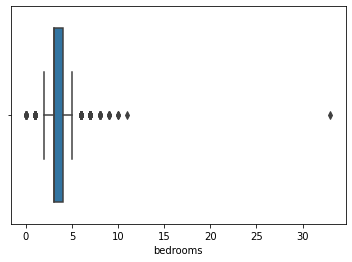

In [16]:
sns.boxplot(x=df['bedrooms'])

Los valores tipicos son adentro de esta barra azul con los "bigotes" y valores atipicos estan afuera de los "bigotes".

Los elementes de diagrama de caja (`boxplot`) tiene siguiente estructura:

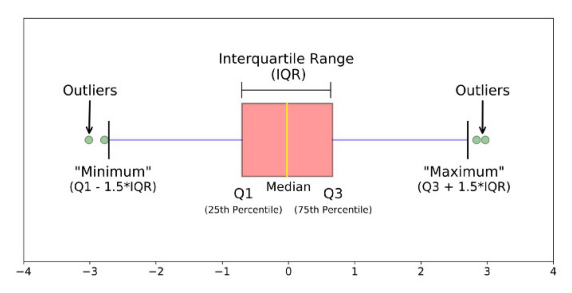

In [17]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,6))
ax.imshow(plt.imread('imgs/outliers.jpeg'))
ax.set_axis_off()

* mediana (Q2, percentil50): el valor medio del conjunto de datos.
* primer cuartil (Q1, percentil 25): el número medio entre el número más pequeño (no el "mínimo") y la mediana del conjunto de datos.
* tercer cuartil (Q3, percentil 75): el valor medio entre la mediana y el valor más alto (no el "máximo") del conjunto de datos.
* rango intercuartílico (IQR): percentil 25 al 75.
* bigotes (mostrado en azul)


* valores atípicos (mostrados como círculos verdes)
  * mas grandes que : Q3 + 1.5*IQR
  * mas pequenos que: Q1 -1.5*IQR

El diagrama de caja utiliza el método IQR para mostrar datos y valores atípicos (forma de los datos), pero para obtener una lista de valores atípicos identificados, necesitaremos usar la fórmula matemática y recuperar los datos atípicos.

El rango intercuartílico (IQR), también llamado midspread o mid 50%, es una medida de dispersión estadística, siendo igual a la diferencia entre los percentiles 75 y 25, o entre los cuartiles superior e inferior, IQR = Q3 - Q1.


En otras palabras, el IQR es el primer cuartil restado del tercer cuartil; estos cuartiles se pueden ver claramente en un diagrama de caja en los datos.


Diagrama de caja es de hecho una medida de la dispersión similar a la desviación estándar o varianza, pero es mucho más robusta contra valores atípicos. La relacion entre diagrama de caja y distribucion es presentada en el siguiente imagen:

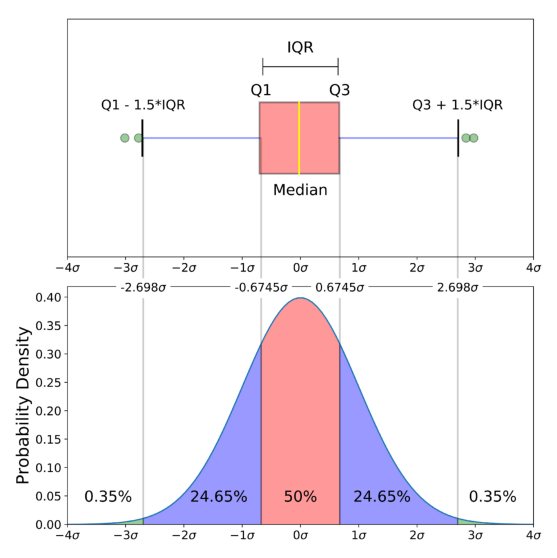

In [18]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.imshow(plt.imread('imgs/boxplot.png'))
ax.set_axis_off()

Mirando primero de diagrama de densidad de probabilidad:

* Alrededor del 68,26 % de todos los datos se encuentran dentro de una desviación estándar (<$\sigma$) de la media ($\mu$), teniendo en cuenta ambos lados, la región rosa de la figura.

* Alrededor del 95,44 % de todos los datos se encuentran dentro de dos desviaciones estándar (2$\sigma$) de la media ($\mu$), teniendo en cuenta ambos lados, la región rosa+azul de la figura.

* Alrededor del 99,72 % de todos los datos se encuentran dentro de las tres desviaciones estándar (<3$\sigma$) de la media ($\mu$), teniendo en cuenta ambos lados, la región rosa+azul+verde de la figura.

* Y el 0,28 % restante de todos los datos se encuentra fuera de las tres desviaciones estándar (>3$\sigma$) de la media ($\mu$), teniendo en cuenta ambos lados, la pequeña región roja de la figura. Y esta parte de los datos se considera como valores atípicos.

Mirando ahora el iagrama de caja que corresponde a diagrama de densidad de probabilidad:
los cuartiles primero y tercero, Q1 y Q3, se encuentran a -0.675$\sigma$ y +0.675$\sigma$ de la media, respectivamente. Aqui se encuentra la relacion entre los dos.

El valor $1.5$, de acuerdo con el método IQR coresponda a 2.7$\sigma$ de la media ($\mu$), en cualquier lado y se considerará como atípico. Y este rango de decisión es el más cercano a lo que nos dice la Distribución Gaussiana, es decir, 3$\sigma$. En otras palabras, esto hace que la regla de decisión se acerque más a lo que Gaussian Distribution considera para la detección de valores atípicos, y esto es exactamente lo que queríamos. Para obtener exactamente 3$\sigma$, necesitamos tomar la escala = 1.7, pero entonces 1.5 es más “simétrico” que 1.7.

Vamos ahora calcular Q1, Q3 y IQR para cada variable del conjunto:

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(Q3+1.5*IQR)

price             1.129519e+06
bedrooms          5.500000e+00
bathrooms         3.625000e+00
sqft_living       4.231125e+03
sqft_lot          1.916062e+04
floors            3.500000e+00
waterfront        0.000000e+00
view              0.000000e+00
condition         5.500000e+00
grade             9.500000e+00
sqft_basement     1.400000e+03
yr_built          2.066000e+03
year_renovated    0.000000e+00
zipcode           9.824550e+04
lat               4.798839e+01
long             -1.218205e+02
sqft_living15     3.665000e+03
sqft_lot15        1.755812e+04
year              2.016500e+03
month             1.650000e+01
day               4.550000e+01
dtype: float64


Specificamente para columna `bedrooms` seria:

In [20]:
IQR['bedrooms']

1.0

In [21]:
valores_maximos_bedrooms=Q3['bedrooms'] + 1.5 * IQR['bedrooms']
print(valores_maximos_bedrooms)

5.5


In [22]:
valores_minimos_bedrooms=Q1['bedrooms'] - 1.5 * IQR['bedrooms']
print(valores_minimos_bedrooms)

1.5


Estos tres valores coresponden a diagrama de caja de columna `bedroom` que presentamos antes:

<AxesSubplot:xlabel='bedrooms'>

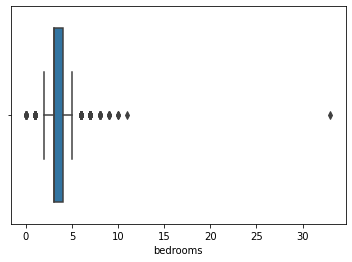

In [23]:
sns.boxplot(x=df['bedrooms'])

* la grosura de la barra azul corresponde a IQR = 1
* el valor minimo coresponde con "los bigotes" (linea fina negra de lado izquierda) = 1.5 
* el valor maximo coresponde con "los bigotes" (linea fina negra de lado derecha) = 5.5 

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

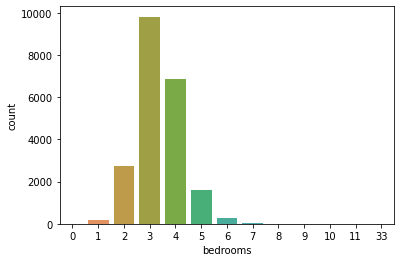

In [24]:
sns.countplot(data=df,x='bedrooms')

vamos, por curiosidad, calcular el percentaje de las casas que tiene atipico numero de cuartos (`bedrooms`)

In [25]:
IQR_outliers_max=(df[df['bedrooms']>(Q3['bedrooms'] + 1.5 * IQR['bedrooms'])].shape[0]/df.shape[0])*100
print(f'{IQR_outliers_max:.2f} %')

1.55 %


In [26]:
IQR_outliers_min=(df[df['bedrooms']<(Q1['bedrooms'] - 1.5 * IQR['bedrooms'])].shape[0]/df.shape[0])*100
print(f'{IQR_outliers_min:.2f} %')

0.98 %


En caso de que sea necesario eliminar los valores atípicos de el variable normalmente distribuida muy util es metodo llamado `z-score` que indica cuántas desviaciones estándar de distancia está un punto de datos de la media, ayuda a comprender si un valor de datos es mayor o menor que la media y qué tan lejos está de la media. Si se sigue la regla de los tres sigma, esto solo representa el 0,3% de los datos, lo que parece insignificante pero puede tener efectos desastrosos en nuestro modelo. Para calcular el percentaje de las casas que tiene atipico numero de cuartos (`bedrooms`) con metodo `z-score` usaremos una combinación de los métodos zscore() y abs() de scipy.

In [27]:
zscore_outliers_max=(df[(np.abs(stats.zscore(df['bedrooms'])) > 3)].shape[0]/df.shape[0])*100
print(f'{zscore_outliers_max:.2f} %')

0.35 %


Los metodos de boxplot, IQR (InterQuartile Range) y `z-score` para identificar los valores atipicos son solamente heramientas de exploratorio de datos, que no significa que todos valore atipicos tienen que ser removidos (`df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]`). La mayoría de los académicos argumentan que, a menos que tenga una razón muy convincente para eliminar una observación particular de su archivo de datos, lidiar con valores atípicos es más problemático de lo que vale. Usted podría obtener un conjunto de datos un poco más limpio, pero a expensas de perder puntos de datos quizás significativos.

En general:

* Elimina un valor atípico si:

  * Sabes que está mal
  * Tiene una gran cantidad de datos, por lo que su muestra no se verá afectada si se descarta un valor atípico cuestionable.
  * Puede volver atrás y recordar o verificar el punto de datos cuestionable.

En conclusión, probablemente la casa con 33 cuartos y precio de 5 cuartos parece como valor atípico y puede ser removido. También las casas sin dormitorios no parece realistico.

In [28]:
df = df[df['bedrooms'] <= 20]

In [29]:
df = df[df['bedrooms'] > 0]

In [30]:
df.shape

(21598, 23)

Curiosamente en el conjunto hay algunos valores flotantes en el número de los baños, sin embargo segun de algunos fuentes (https://illinado.com/what-is-a-quarter-bath/#:~:text=Well%2C%20a%20quarter%20bath%20is,it%20only%20has%20a%20toilet) es normal no tener un tamaño de baño completo.

### 8. Comprobar la normalidad de la distribución de variable continua (skewness - disimetría)

Una suposición de regresión lineal exige que las variables continuas tengan una distribución normal o gaussiana. La función `distplot()` de Seaborn grafica variables individuales con un KDE (Kernel Density Estimate - estimación de densidad del núcleo) junto con un histograma. En una distribución normal, la media divide la curva simétricamente en dos partes iguales en la mediana y el valor de la asimetría es cero. El metodo `skew` es una medida de la asimetría de una distribución.

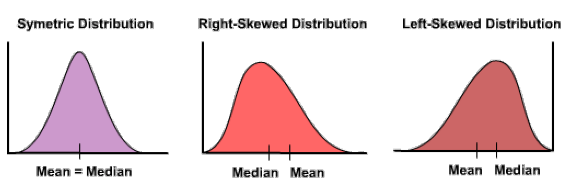

In [31]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(plt.imread('imgs/skewness2.jpg'))
ax.set_axis_off()

Vamos hacer plot de la distribucion de variable `precio`:

/home/michal/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

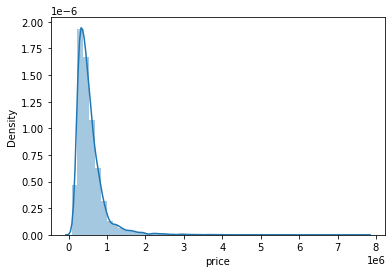

In [32]:
sns.distplot(df['price'])

Vamos encontrar valor cuantitativo de la asimetria de variable `precio`:

In [33]:
print(df['price'].skew()) 

4.025609886330966


El valor de asimetría de 4.0 muestra que la variable `price` tiene una distribución sesgada a la derecha, lo que indica la presencia de valores extremadamente más grandes. Lo que es de acuerdo con el `distplot` arriva. (En casos extremos cuando el hecho sesgado es más de 5 es posible transformar la variable utilizando la función logaritímica `df['price'] = np.log(df['price']))`.

### 9. Pandas Profiling

Gran parte del análisis exploratorio que hemos realizado se puede automatizar usando la herramienta de perfilado de Pandas. Para un conjunto de datos, proporciona las siguientes estadísticas:

*     Esenciales: tipo, valores faltantes, valores únicos,
*     Estadísticas de cuantiles como valor mínimo, Q1, Q2, Q3, rango intercuartílico
*     Estadísticas descriptivas como media, mediana, dispersion
*     Histogramas y correlaciones entre variables

Herramienta de perfilado de Pandas crea un informe en formato HTML que consta de diferentes estadísticas sobre los datos en siguientes secciones:

Visión de conjunto:

* Proporciona la información general del conjunto de datos. La sección de descripción general consta de 2 secciones que son "Información del conjunto de datos" y "Tipos de variables".

* La información del conjunto de datos muestra diferentes variables como columnas y filas, celdas faltantes, duplicadas, etc., mientras que los tipos de variables presentan cuántos atributos son de tipo numérico, categórico, booleano, etc. También presenta ciertas advertencias donde revela los atributos que están altamente correlacionados con otros.

Variables:

* Esta sección brinda información sobre cada característica una por una Lejos de la sección de descripción general que presenta la información sobre todo el conjunto de datos. La sección revela información como puntos únicos con su porcentaje, valores faltantes con porcentaje. Además, da valores mínimos y máximos con el porcentaje de ceros en esa columna.

Correlación

* Esta sección del informe brinda la visualización de cómo los atributos se correlacionan entre sí con los mapas de calor del paquete marítimo. Puede obtener una comprensión de la relación entre las características.

Valores faltantes

* La sección de valor faltante da dos subsecciones que son matriz y conteo. En el gráfico de matriz, podemos ver los valores que faltan, mientras que el gráfico de conteo presenta el conteo de puntos de datos en cada atributo.

Al final se muestra un ejemplo del informe de perfilado de Pandas, ajustado para advertir si el coeficiente de correlación de Pearson supera el valor 0.8, como se hizo en el análisis anterior.

In [34]:
import pandas_profiling as pp

In [35]:
report = pp.ProfileReport(df, 
                        correlations={"pearson":  {"calculate": True, "threshold": 0.8},
                                      "spearman": {"calculate": False},
                                      "kendall":  {"calculate": False},
                                      "phi_k":    {"calculate": False},
                                      "cramers":  {"calculate": False}},
                        explorative=True,
                        missing_diagrams=None, 
                        interactions=None)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]